# Huấn luyện và đánh giá mô hình Hồi quy Logistic (Tuned)

Notebook này tổng hợp pipeline xử lý, huấn luyện và sinh hình ma trận nhầm lẫn cho mô hình Hồi quy Logistic với tham số tối ưu (theo phiên bản dm2).

## 1. Nhập các thư viện cần thiết
Sử dụng các thư viện phổ biến cho xử lý dữ liệu, huấn luyện mô hình và trực quan hóa.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 2. Tải và xử lý dữ liệu
Tải dữ liệu vào DataFrame, kiểm tra thông tin tổng quan, xử lý dữ liệu thiếu và chuẩn hóa dữ liệu nếu cần.

In [38]:
# Tải dữ liệu
# (Giữ đúng pipeline dm2)
data = pd.read_csv('heart.csv')
print(f"Số dòng ban đầu: {len(data)}")
data = data.drop_duplicates()
print(f"Số dòng sau khi loại trùng lặp: {len(data)}")
print("Thông tin tổng quan về dữ liệu:")
print(data.info())
print("\nSố lượng giá trị thiếu mỗi cột:")
print(data.isnull().sum())

Số dòng ban đầu: 918
Số dòng sau khi loại trùng lặp: 918
Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Số lượng giá trị thiếu mỗi cột:
Age               0
Sex               0
ChestPainType     0
RestingBP      

## 3. Chia tập dữ liệu thành train/test
Tiền xử lý: one-hot encoding, scaling, chia train/test (theo pipeline dm2 cho Logistic Regression).

In [39]:
# Tiền xử lý đặc trưng (theo dm2)
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X = data.drop('HeartDisease', axis=1)
Y = data['HeartDisease']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Chia train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling các biến số
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"Tập huấn luyện: {X_train.shape}\nTập kiểm tra: {X_test.shape}")

Tập huấn luyện: (734, 15)
Tập kiểm tra: (184, 15)


## 4. Huấn luyện mô hình Hồi quy Logistic với tham số tối ưu (dm2)
Sử dụng GridSearchCV để tìm tham số tối ưu, sau đó huấn luyện mô hình với tham số này.

In [40]:
# Tinh chỉnh tham số C bằng GridSearchCV (theo dm2)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='recall'
)
grid.fit(X_train, Y_train)
print(grid.cv_results_)
print(f"Giá trị C tốt nhất: {grid.best_params_['C']}")
best_model = grid.best_estimator_

# Huấn luyện lại với tham số tối ưu
best_model.fit(X_train, Y_train)

{'mean_fit_time': array([0.00219564, 0.00194874, 0.00330944, 0.0024364 , 0.00229325]), 'std_fit_time': array([2.16313717e-04, 8.78666888e-05, 1.41408896e-03, 3.38459438e-04,
       1.16845985e-04]), 'mean_score_time': array([0.00207458, 0.00186524, 0.00347314, 0.00201573, 0.00198579]), 'std_score_time': array([1.33453645e-04, 5.07990718e-05, 1.64550314e-03, 2.06348138e-04,
       7.59872591e-05]), 'param_C': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.8875, 0.9   , 0.8875, 0.875 , 0.875 ]), 'split1_test_score': array([0.9125, 0.925 , 0.8875, 0.8875, 0.8875]), 'split2_test_score': array([0.85  , 0.9   , 0.8875, 0.9   , 0.9   ]), 'split3_test_score': array([0.85185185, 0.86419753, 0.86419753, 0.86419753, 0.86419753]), 'split4_test_score': array([0.8875, 0.9125, 0.9125, 0.9125, 0.9125]), 'mean_test_score':

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


## 5. Dự đoán và đánh giá mô hình
Dự đoán trên tập kiểm tra, tính toán các chỉ số đánh giá như accuracy, precision, recall, F1-score.

In [41]:
# Dự đoán và đánh giá
Y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(Y_test, Y_pred_best)
precision_best = precision_score(Y_test, Y_pred_best)
recall_best = recall_score(Y_test, Y_pred_best)
f1_best = f1_score(Y_test, Y_pred_best)

print(f"--- Đánh giá mô hình Logistic Regression tốt nhất: ---")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")

--- Đánh giá mô hình Logistic Regression tốt nhất: ---
Accuracy: 0.8370
Precision: 0.8969
Recall: 0.8131
F1-Score: 0.8529


## 6. Vẽ ma trận nhầm lẫn
Sử dụng confusion_matrix và seaborn để vẽ hình ma trận nhầm lẫn cho kết quả dự đoán (theo đúng phiên bản dm2).

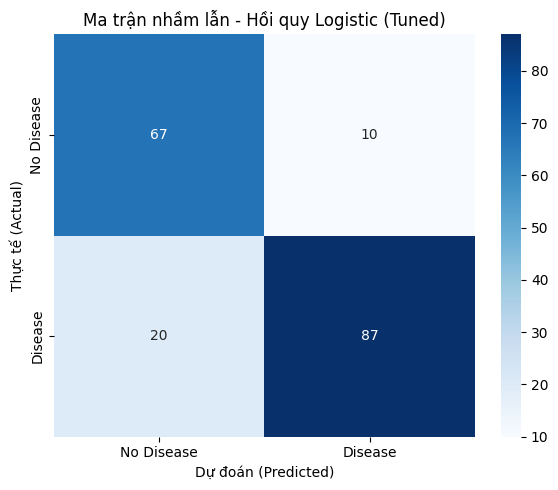

In [42]:
# Vẽ ma trận nhầm lẫn (theo dm2)
cm_best = confusion_matrix(Y_test, Y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận nhầm lẫn - Hồi quy Logistic (Tuned)')
plt.tight_layout()
# Overwrite old logistic confusion matrix file used in LaTeX
plt.savefig('images/hinh-cm-lr.png', dpi=300)
plt.show()

---

# Huấn luyện và đánh giá mô hình KNN

Notebook tiếp tục với pipeline xử lý, huấn luyện và sinh hình ma trận nhầm lẫn cho mô hình KNN, sử dụng đúng pipeline tiền xử lý như file 2-KNN.ipynb.

## 1. Tiền xử lý dữ liệu cho KNN
Sử dụng one-hot encoding, scaling và chia train/test như pipeline của 2-KNN.ipynb.

In [43]:
# Tiền xử lý lại cho KNN (độc lập với phần trước)
data_knn = pd.read_csv('heart.csv').drop_duplicates()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_knn = data_knn.drop('HeartDisease', axis=1)
Y_knn = data_knn['HeartDisease']
X_knn = pd.get_dummies(X_knn, columns=categorical_cols, drop_first=True)

X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.2, random_state=42)

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler_knn = StandardScaler()
X_train_knn[numerical_cols] = scaler_knn.fit_transform(X_train_knn[numerical_cols])
X_test_knn[numerical_cols] = scaler_knn.transform(X_test_knn[numerical_cols])

## 2. Huấn luyện mô hình KNN với tham số tối ưu
Sử dụng GridSearchCV để tìm tham số tối ưu, sau đó huấn luyện mô hình với tham số này.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# GridSearchCV cho KNN
grid_params = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['distance', 'uniform'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(X_train_knn, Y_train_knn)
print(f"Best Hyperparameters: {grid_search_knn.best_params_}")
print(f"Best F1-Score from GridSearchCV: {grid_search_knn.best_score_:.4f}")
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train_knn, Y_train_knn)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best F1-Score from GridSearchCV: 0.8890


,n_neighbors,18
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


## 3. Dự đoán và đánh giá mô hình KNN
Dự đoán trên tập kiểm tra, tính toán các chỉ số đánh giá như accuracy, precision, recall, F1-score.

In [45]:
Y_pred_knn = best_knn.predict(X_test_knn)
accuracy_knn = accuracy_score(Y_test_knn, Y_pred_knn)
precision_knn = precision_score(Y_test_knn, Y_pred_knn)
recall_knn = recall_score(Y_test_knn, Y_pred_knn)
f1_knn = f1_score(Y_test_knn, Y_pred_knn)

print(f"--- Đánh giá mô hình KNN tốt nhất: ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

--- Đánh giá mô hình KNN tốt nhất: ---
Accuracy: 0.8804
Precision: 0.8972
Recall: 0.8972
F1-Score: 0.8972


## 4. Vẽ ma trận nhầm lẫn KNN
Sử dụng confusion_matrix và seaborn để vẽ hình ma trận nhầm lẫn cho kết quả dự đoán KNN.

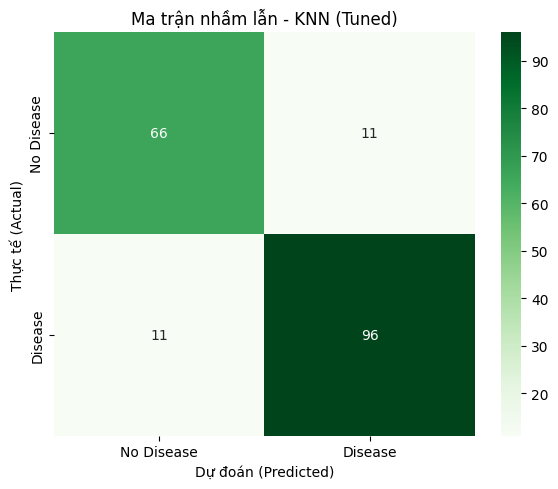

In [46]:
cm_knn = confusion_matrix(Y_test_knn, Y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận nhầm lẫn - KNN (Tuned)')
plt.tight_layout()
# Overwrite old KNN confusion matrix file used in LaTeX
plt.savefig('images/hinh-cm-knn.png', dpi=300)
plt.show()

---

# Huấn luyện và đánh giá mô hình Decision Tree

Tiếp tục với pipeline xử lý, huấn luyện và sinh hình ma trận nhầm lẫn cho Decision Tree, sử dụng đúng pipeline tiền xử lý như file 3-Decision-Tree.ipynb.

## 1. Tiền xử lý dữ liệu cho Decision Tree
Sử dụng one-hot encoding, KHÔNG scaling, chia train/test như pipeline của 3-Decision-Tree.ipynb.

In [47]:
# Tiền xử lý cho Decision Tree (không scaling)
data_dt = pd.read_csv('heart.csv').drop_duplicates()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_dt = data_dt.drop('HeartDisease', axis=1)
Y_dt = data_dt['HeartDisease']
X_dt = pd.get_dummies(X_dt, columns=categorical_cols, drop_first=True)

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.2, random_state=42)

## 2. Huấn luyện mô hình Decision Tree với tham số tối ưu
Sử dụng GridSearchCV để tìm tham số tối ưu, sau đó huấn luyện mô hình với tham số này.

In [48]:
from sklearn.tree import DecisionTreeClassifier
# GridSearchCV cho Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15]
}
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='recall',
    cv=5,
    n_jobs=-1
)
grid_search_dt.fit(X_train_dt, Y_train_dt)
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best Recall from GridSearchCV: {grid_search_dt.best_score_:.4f}")
best_model_dt = grid_search_dt.best_estimator_
best_model_dt.fit(X_train_dt, Y_train_dt)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Recall from GridSearchCV: 0.8853


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,20
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 3. Dự đoán và đánh giá mô hình Decision Tree
Dự đoán trên tập kiểm tra, tính toán các chỉ số đánh giá như accuracy, precision, recall, F1-score.

In [49]:
Y_pred_dt = best_model_dt.predict(X_test_dt)
accuracy_dt = accuracy_score(Y_test_dt, Y_pred_dt)
precision_dt = precision_score(Y_test_dt, Y_pred_dt)
recall_dt = recall_score(Y_test_dt, Y_pred_dt)
f1_dt = f1_score(Y_test_dt, Y_pred_dt)

print(f"--- Đánh giá mô hình Decision Tree tốt nhất: ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

--- Đánh giá mô hình Decision Tree tốt nhất: ---
Accuracy: 0.8696
Precision: 0.8879
Recall: 0.8879
F1-Score: 0.8879


## 4. Vẽ ma trận nhầm lẫn Decision Tree
Sử dụng confusion_matrix và seaborn để vẽ hình ma trận nhầm lẫn cho kết quả dự đoán Decision Tree.

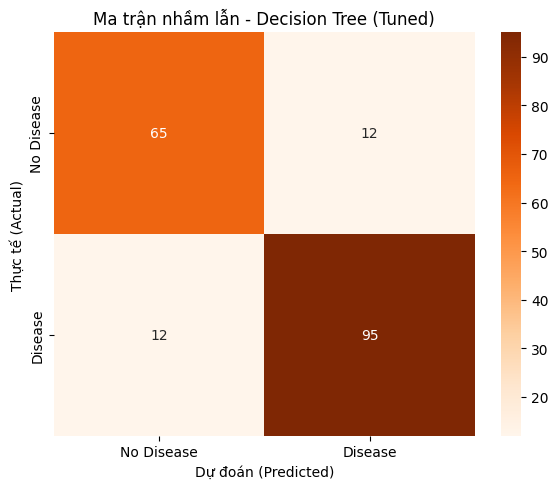

In [50]:
cm_dt = confusion_matrix(Y_test_dt, Y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận nhầm lẫn - Decision Tree (Tuned)')
plt.tight_layout()
# File confusion matrix Decision Tree (add or overwrite)
plt.savefig('images/hinh-cm-dt.png', dpi=300)
plt.show()

---

# Huấn luyện và đánh giá mô hình Random Forest

Tiếp tục với pipeline xử lý, huấn luyện và sinh hình ma trận nhầm lẫn cho Random Forest, sử dụng đúng pipeline tiền xử lý như file 4-Random-Forest.ipynb.

## 1. Tiền xử lý dữ liệu cho Random Forest
Sử dụng one-hot encoding, KHÔNG scaling, chia train/test như pipeline của 4-Random-Forest.ipynb.

In [51]:
# Tiền xử lý cho Random Forest (không scaling)
data_rf = pd.read_csv('heart.csv').drop_duplicates()
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_rf = data_rf.drop('HeartDisease', axis=1)
Y_rf = data_rf['HeartDisease']
X_rf = pd.get_dummies(X_rf, columns=categorical_cols, drop_first=True)

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.2, random_state=42)

## 2. Huấn luyện mô hình Random Forest với tham số tối ưu
Sử dụng GridSearchCV để tìm tham số tối ưu, sau đó huấn luyện mô hình với tham số này.

In [52]:
from sklearn.ensemble import RandomForestClassifier
# GridSearchCV cho Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)
print("Bắt đầu GridSearchCV cho Random Forest...")
grid_search_rf.fit(X_train_rf, Y_train_rf)
print(f"\nBest Hyperparameters: {grid_search_rf.best_params_}")
print(f"Best Recall from GridSearchCV: {grid_search_rf.best_score_:.4f}")
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train_rf, Y_train_rf)

Bắt đầu GridSearchCV cho Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 300}
Best Recall from GridSearchCV: 0.9227


,n_estimators,300
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 3. Dự đoán và đánh giá mô hình Random Forest
Dự đoán trên tập kiểm tra, tính toán các chỉ số đánh giá như accuracy, precision, recall, F1-score.

In [53]:
Y_pred_rf = best_model_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(Y_test_rf, Y_pred_rf)
precision_rf = precision_score(Y_test_rf, Y_pred_rf)
recall_rf = recall_score(Y_test_rf, Y_pred_rf)
f1_rf = f1_score(Y_test_rf, Y_pred_rf)

print(f"--- Đánh giá mô hình Random Forest tốt nhất: ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

--- Đánh giá mô hình Random Forest tốt nhất: ---
Accuracy: 0.8641
Precision: 0.8868
Recall: 0.8785
F1-Score: 0.8826


## 4. Vẽ ma trận nhầm lẫn Random Forest
Sử dụng confusion_matrix và seaborn để vẽ hình ma trận nhầm lẫn cho kết quả dự đoán Random Forest.

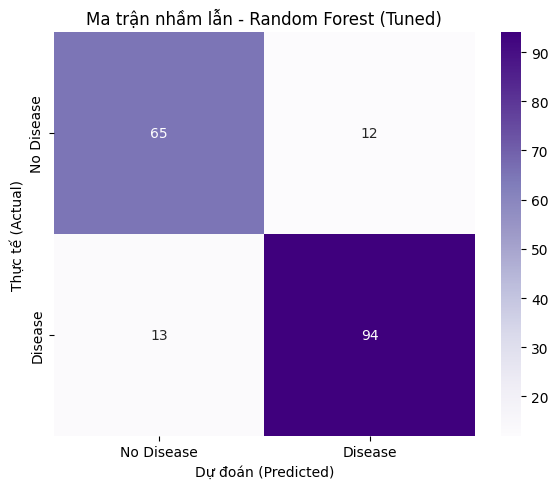

In [54]:
cm_rf = confusion_matrix(Y_test_rf, Y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận nhầm lẫn - Random Forest (Tuned)')
plt.tight_layout()
# Overwrite old Random Forest confusion matrix file used in LaTeX
plt.savefig('images/hinh-cm-rf.png', dpi=300)
plt.show()